# 🚀 GST Analytics Hackathon Project

Welcome to my project submission for the **GST Analytics Hackathon**! This project aims to develop an innovative predictive model that can accurately classify entities within the GST system. Leveraging cutting-edge techniques in machine learning, this project addresses a complex binary classification problem using a large dataset provided by the GST Analytics team.

## 📁 Project Overview

- **Objective**: To create a supervised learning model that predicts whether a specific entity is classified as "0" or "1" based on various features.
- **Dataset**: The dataset contains 9 lakh records with 23 attributes, spread over training and testing sets.
- **Methodology**: The project involves data preprocessing, feature engineering, model training, and evaluation using various performance metrics.
- **Tools & Technologies**: Python, scikit-learn, XGBoost, Pandas, Optuna and more.

## 🔍 Key Evaluation Metrics

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **AUC-ROC Curve**
- **Confusion Matrix**

## 🌟 Why This Project?

This project not only showcases my technical skills in data science but also contributes to the development of solutions that can enhance the efficiency of the GST system in India.

Let's dive in! 💡


## Importing libraries, data and getting started

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import kaleido
import plotly.io as pio
pio.renderers.default = "png"
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn import metrics

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from collections import Counter

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

import joblib

seed = 0
np.random.seed(0)

In [298]:
xtrain = pd.read_csv('data/X_Train_Data_Input.csv')
xtest  = pd.read_csv('data/X_Test_Data_Input.csv')
ytrain = pd.read_csv('data/Y_Train_Data_Target.csv')
ytest  = pd.read_csv('data/Y_Test_Data_Target.csv')

## EDA For X Train

In [299]:
xtrain_id = xtrain['ID'] # Storing ID for later use
ytrain_id = ytrain['ID'] # Storing ID for later use
xtest_id = xtest['ID']   # Storing ID for later use
ytest_id = ytest['ID']   # Storing ID for later use

xtrain.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose
ytrain.drop(columns = ['ID'], inplace=True) # Dropping ID column for EDA + Modelling purpose
xtest.drop(columns = ['ID'], inplace=True)  # Dropping ID column for EDA + Modelling purpose
ytest.drop(columns = ['ID'], inplace=True)  # Dropping ID column for EDA + Modelling purpose


In [300]:
xtrain.head(10).T

,0,1,2,3,4,5,6,7,8,9
Column0,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
Column1,2495.000000,2495.000000,2495.000000,211.000000,718.000000,886.000000,2495.000000,2495.000000,657.000000,647.000000
Column2,3726.000000,3454.000000,4543.000000,59.000000,950.000000,2842.000000,2612.000000,3053.000000,137.000000,1678.000000
Column3,0.678139,0.452580,-1.577453,NaN,-2.028572,-1.126335,-2.028572,0.678139,-0.404545,-2.028572
Column4,0.701403,0.701403,-1.429540,NaN,-1.855728,-1.216445,-1.855728,0.701403,-0.321449,-1.571603
Column5,-0.007468,-0.007468,-0.007469,NaN,NaN,-0.007469,-0.007468,-0.007468,-0.007467,-0.007469
Column6,0.434190,1.554998,-0.407939,-0.407939,-0.407939,-0.407939,-0.402851,-0.094001,-0.407939,-0.407939
Column7,-0.015603,-0.015574,-0.015607,-0.015607,-0.015607,-0.015607,-0.015607,-0.015605,-0.015607,-0.015607
Column8,0.606265,0.329946,-0.774979,-0.774979,-0.774979,-0.774979,0.673163,0.136592,0.634026,-0.774979
Column9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
round(xtrain.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Column0,785124.0,0.44,1.16,0.00,0.00,0.00,0.00,18.00
Column1,785133.0,1321.79,907.27,-1080.00,515.00,1173.00,2435.00,2499.00
Column2,785133.0,2951.28,2143.14,-47.00,1129.00,2709.00,4472.00,10290.00
Column3,658830.0,-0.00,1.00,-2.03,-0.68,0.68,0.68,0.68
Column4,657423.0,-0.00,1.00,-1.86,-0.58,0.70,0.70,0.70
Column5,617953.0,-0.00,1.02,-0.01,-0.01,-0.01,-0.01,551.42
Column6,781283.0,-0.00,1.00,-0.41,-0.41,-0.41,-0.37,14.99
Column7,785133.0,0.00,1.05,-0.02,-0.02,-0.02,-0.02,201.69
Column8,781283.0,-0.00,1.06,-0.77,-0.77,0.12,0.63,323.99
Column9,52996.0,0.01,1.11,-0.09,-0.09,-0.08,-0.06,133.91


In [302]:
info_xtrain = pd.DataFrame({
    'Num of unique values': xtrain.nunique(),   # Number of unique vales in each column
    'Standard Deviation': round(xtrain.std(), 2), # Standard deviation of each column
    'Varience': round(xtrain.var(), 2), # Variance of each column
    '% of Null values': round(xtrain.isna().mean() * 100, 2),  # Percentage NaN for each column
    '% of unique populated values': round(xtrain.nunique()/(xtrain.shape[0]-xtrain.isna().sum()) * 100) # Percentage oof unique populated values for each column
})
info_xtrain

,Num of unique values,Standard Deviation,Varience,% of Null values,% of unique populated values
Column0,19,1.16,1.35,0.00,0.0
Column1,2564,907.27,823135.16,0.00,0.0
Column2,9424,2143.14,4593049.66,0.00,1.0
Column3,47,1.00,1.00,16.09,0.0
Column4,47,1.00,1.00,16.27,0.0
Column5,148334,1.02,1.03,21.29,24.0
Column6,157264,1.00,1.00,0.49,20.0
Column7,166513,1.05,1.09,0.00,21.0
Column8,355728,1.06,1.12,0.49,46.0
Column9,49650,1.11,1.23,93.25,94.0


In [303]:
traces = {
    'marker_line_width': 1,
     'marker_line_color': 'black'
} # Parameters for visualizations

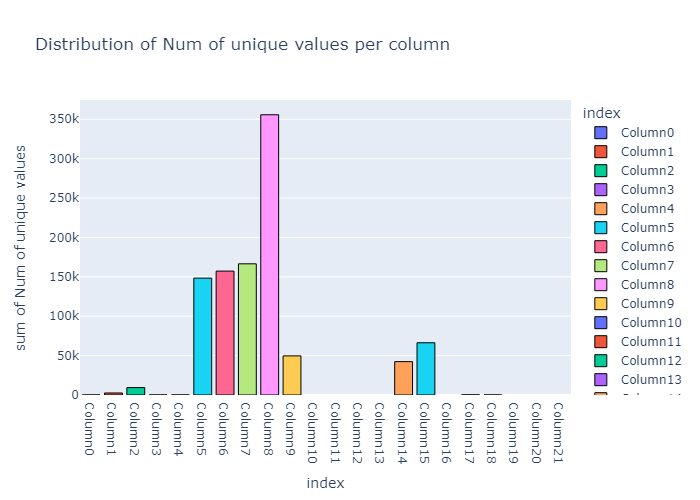

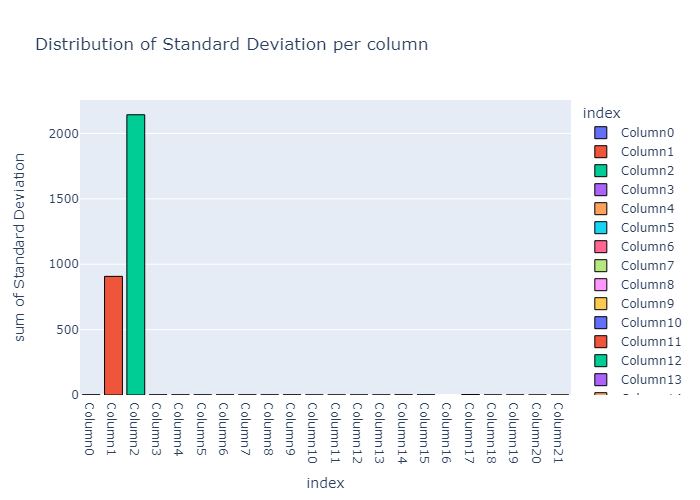

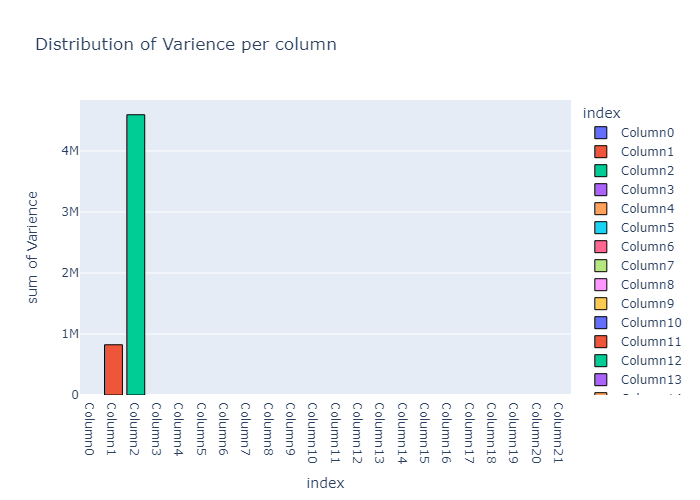

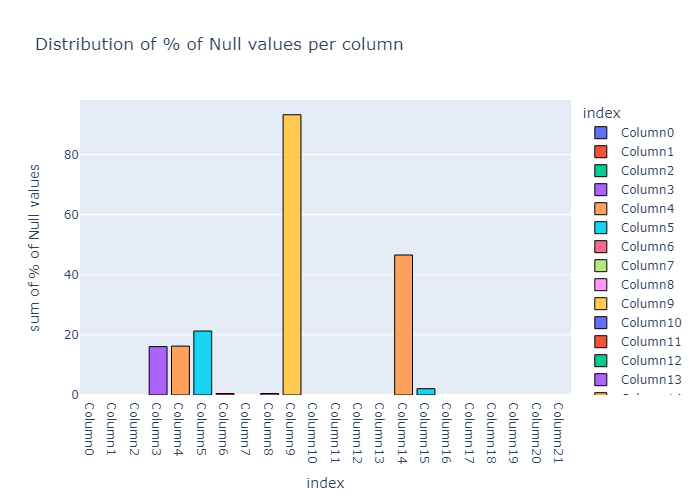

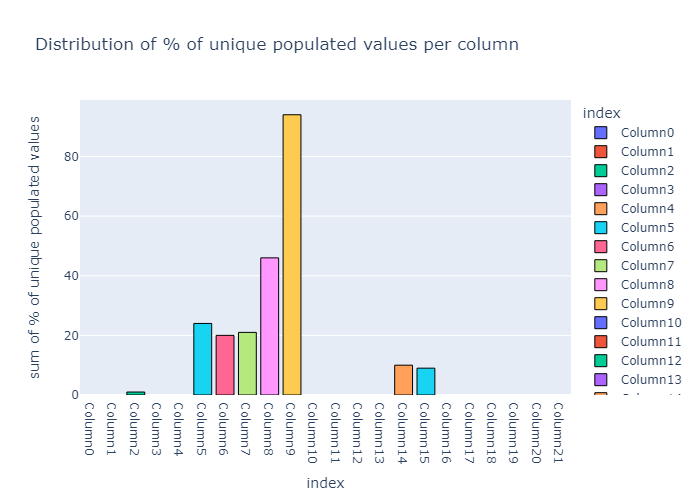

In [304]:
for col in info_xtrain.columns:
    fig = px.histogram(data_frame=info_xtrain, 
                       y = info_xtrain[col], 
                       x = info_xtrain.index,
                       color = info_xtrain.index,
                       title = f'Distribution of {col} per column')
    fig.update_traces(**traces)
    fig.show()

Based on the unique counts and the descriptive analytics of the features, we can infer that: <br><br>
=> Features with low percentage of unique values would be categorical features, and conversly, columns with a higher percentage of unique values would be numeric features.
- Columns `0 - 9 and 14-18` seem to be _numeric features_.
- Columns `10-13 and 19-21` seem to be encoded _categorical features_. 

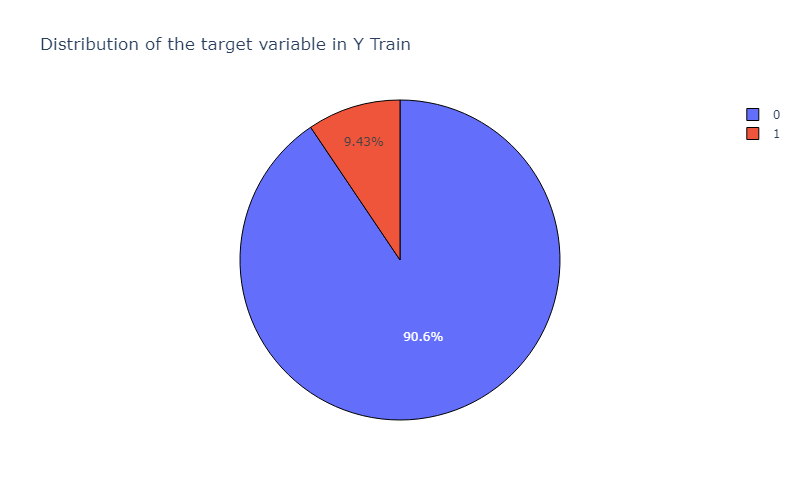

Values in the target variable => 0: 711100, 1: 74033


In [305]:
fig = px.pie(data_frame = ytrain['target'], 
                   names = ytrain['target'], 
                   height = 500, 
                   width = 800, 
                   color = ytrain['target'],
                   title = 'Distribution of the target variable in Y Train')
fig.update_traces(marker_line_width = 1, marker_line_color = 'black')
fig.show()

print(f'Values in the target variable => 0: {Counter(ytrain['target'])[0]}, 1: {Counter(ytrain['target'])[1]}')

### Visualizations for all columns in X Train

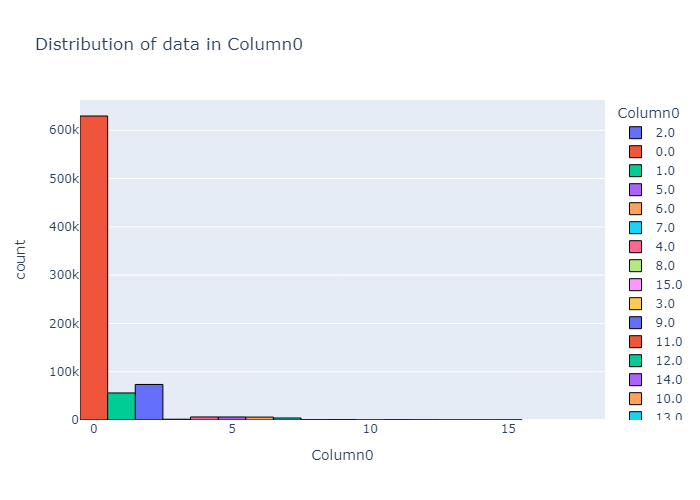

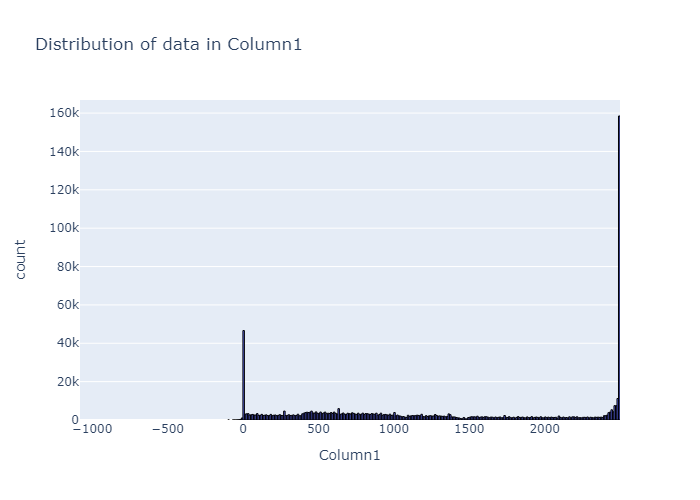

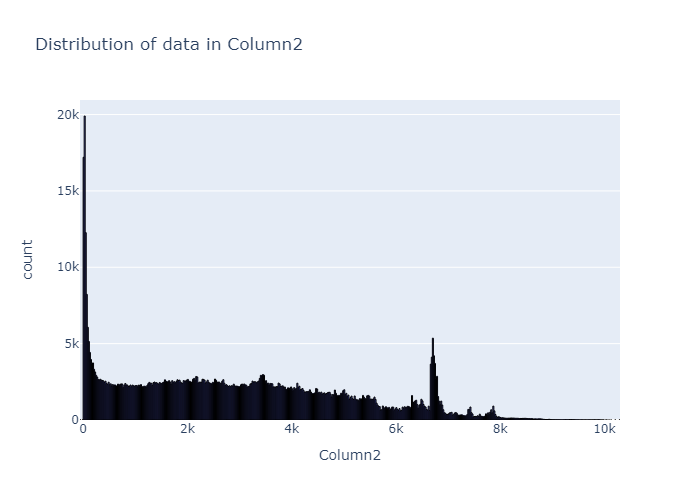

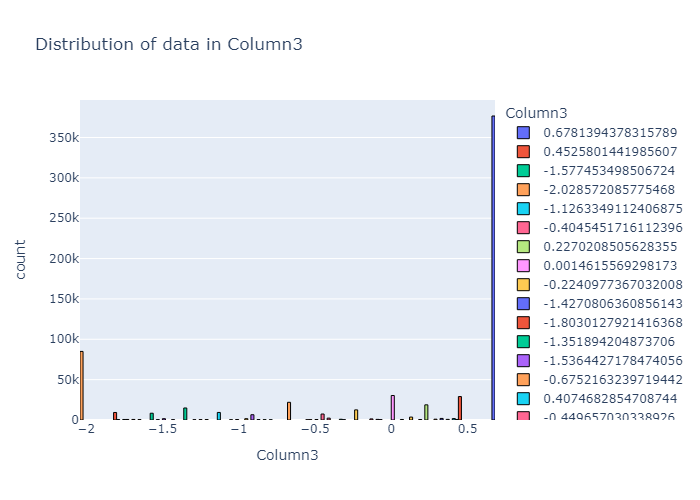

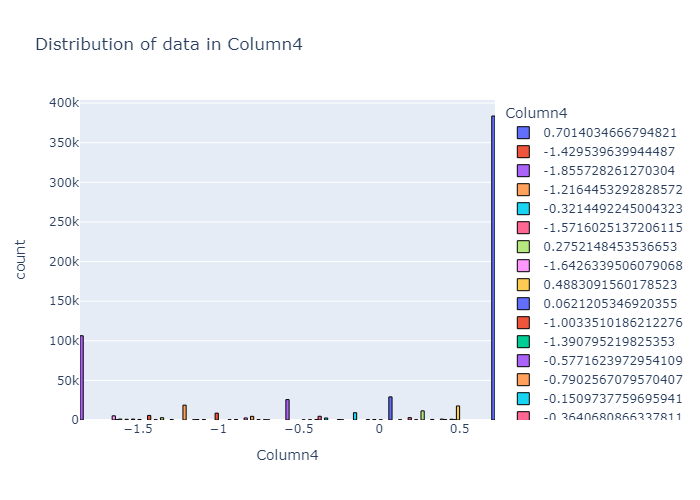

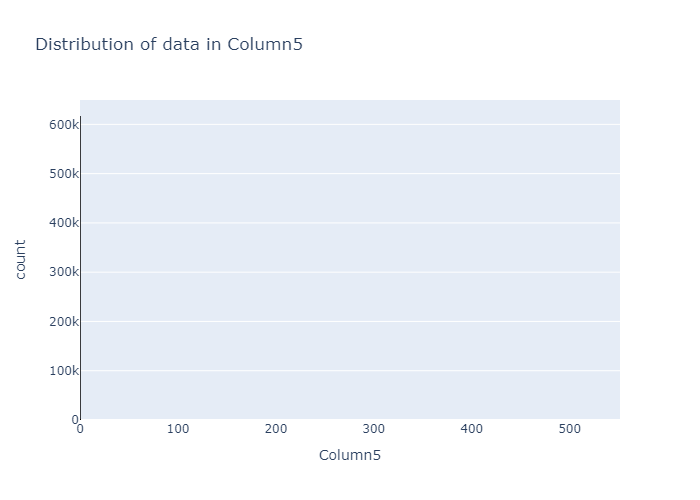

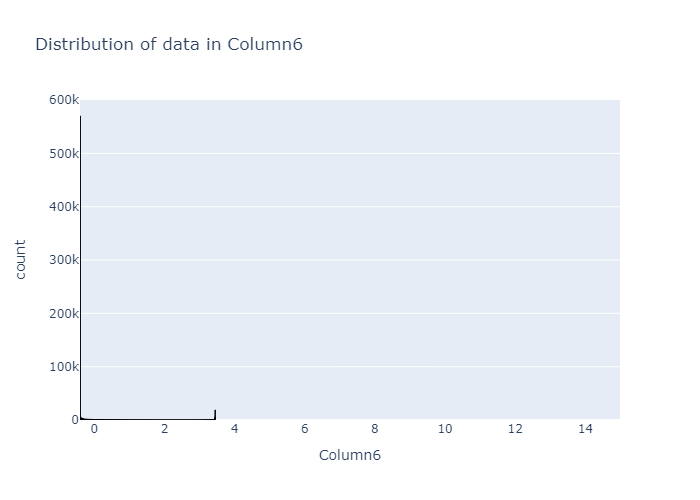

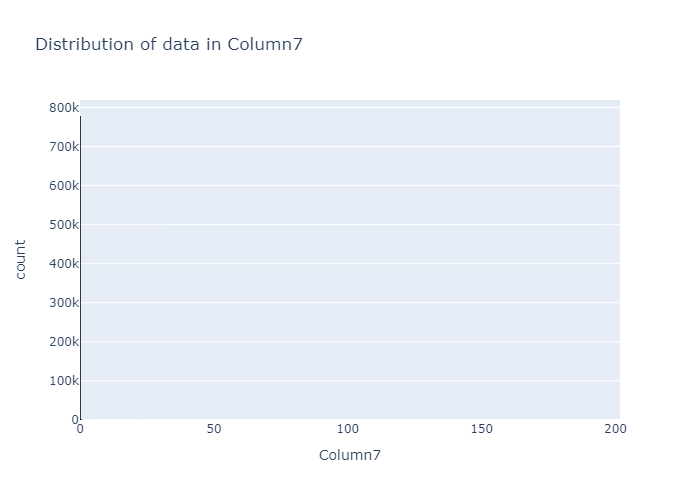

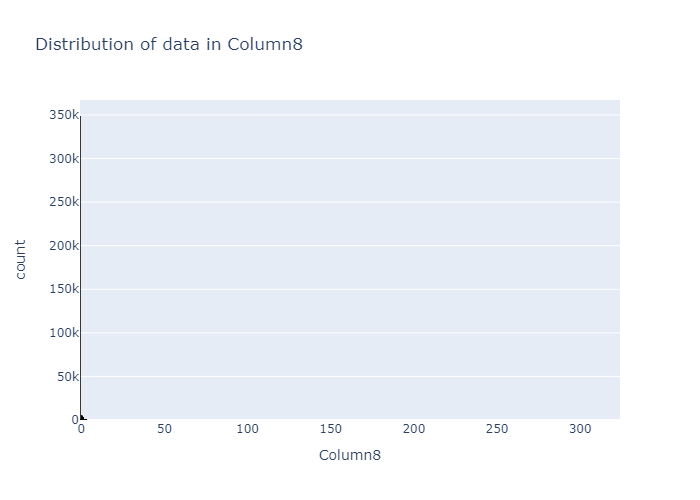

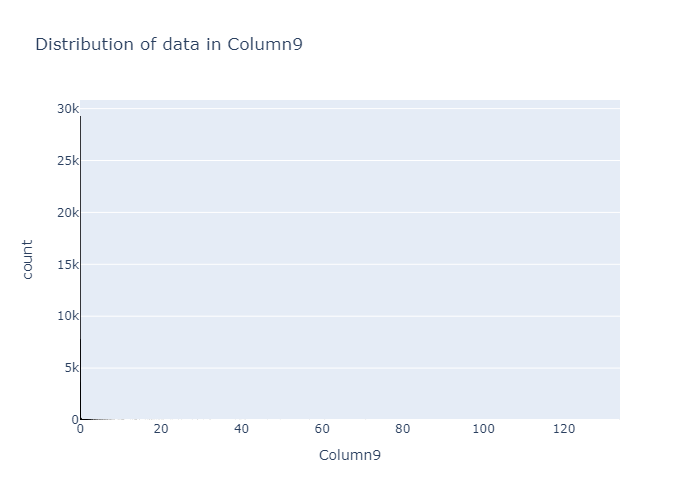

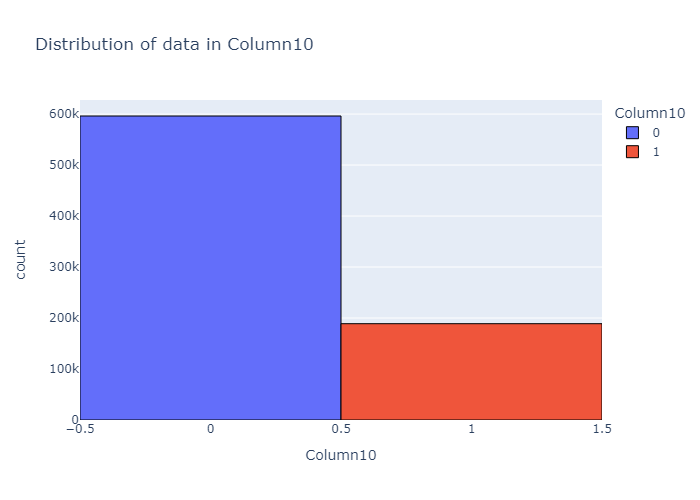

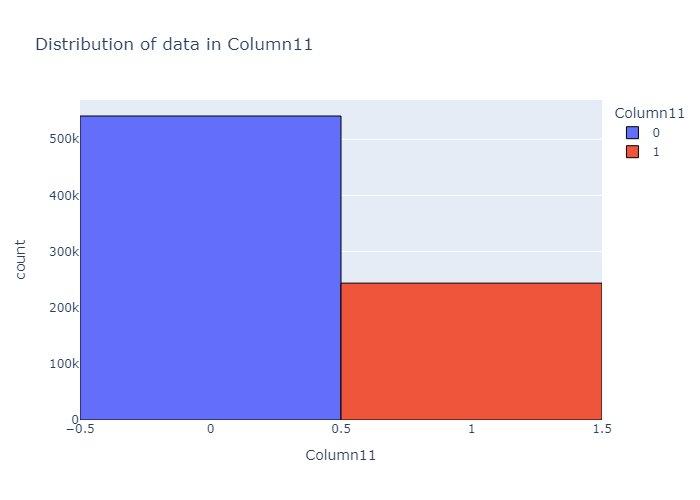

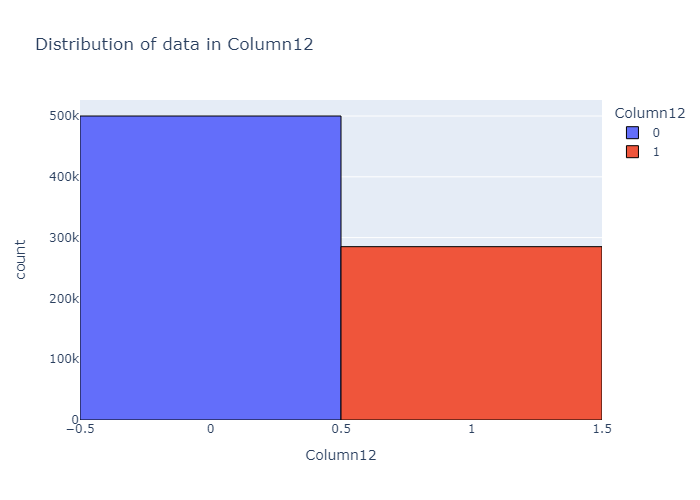

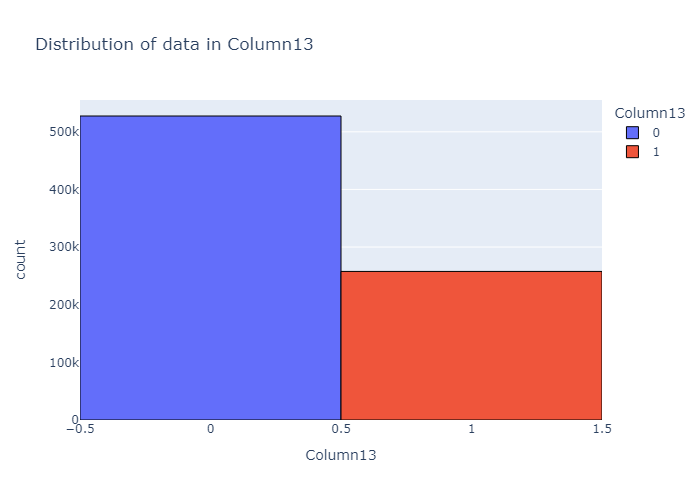

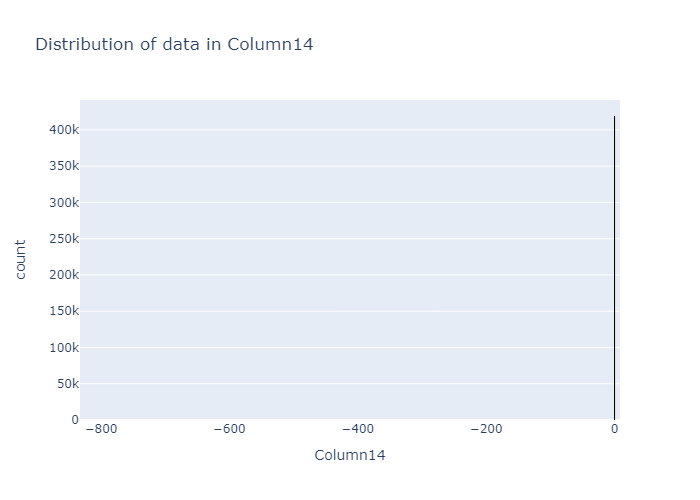

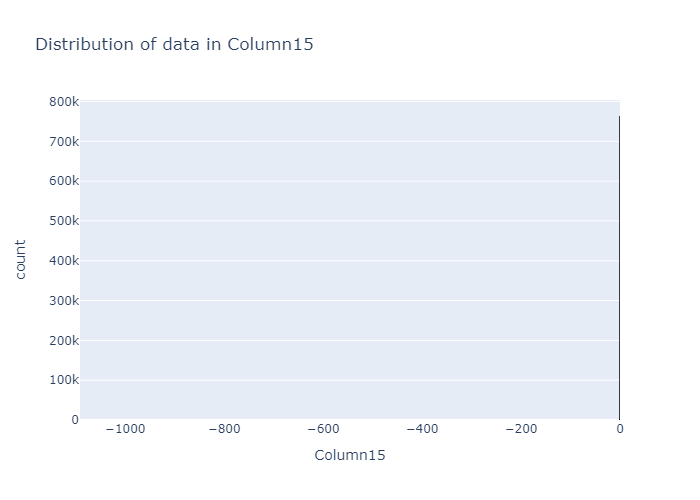

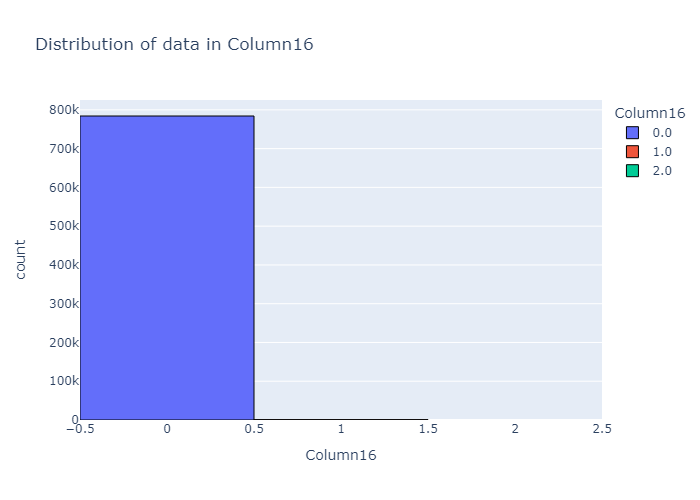

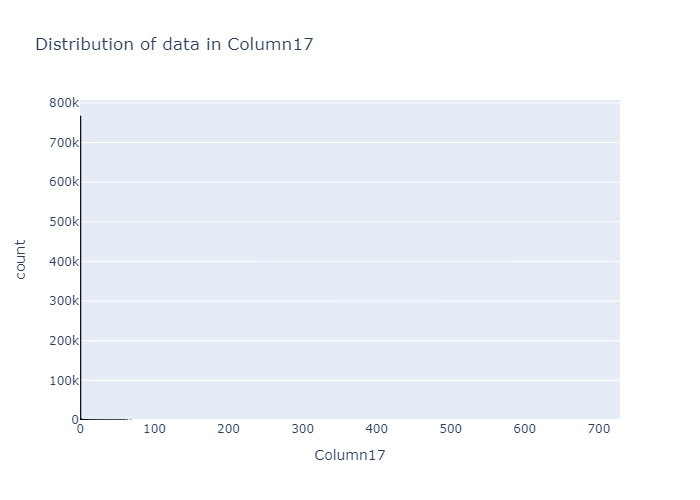

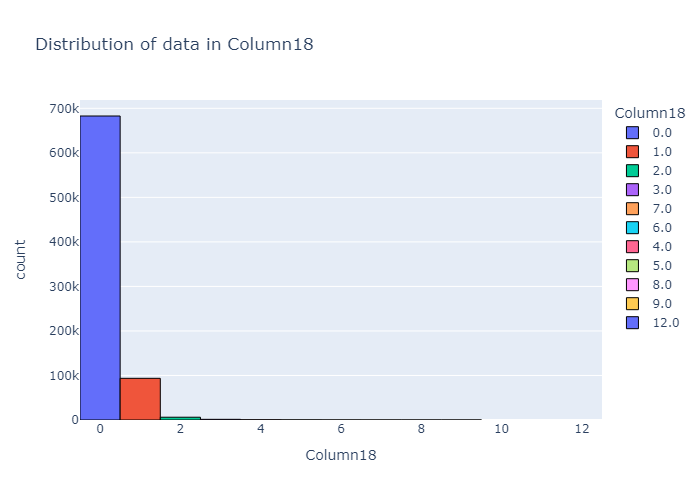

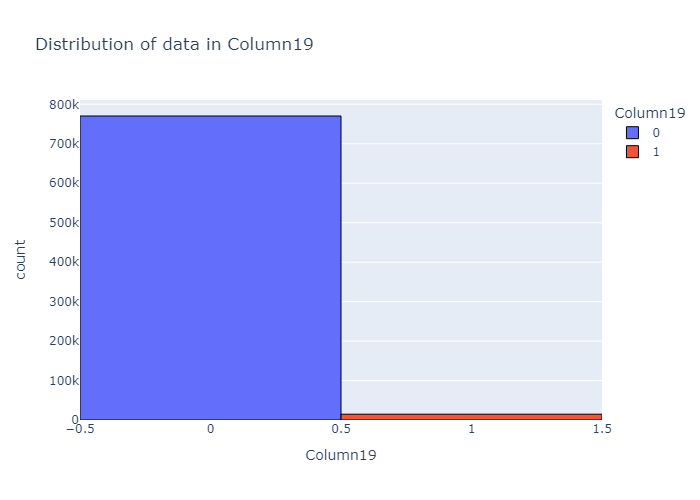

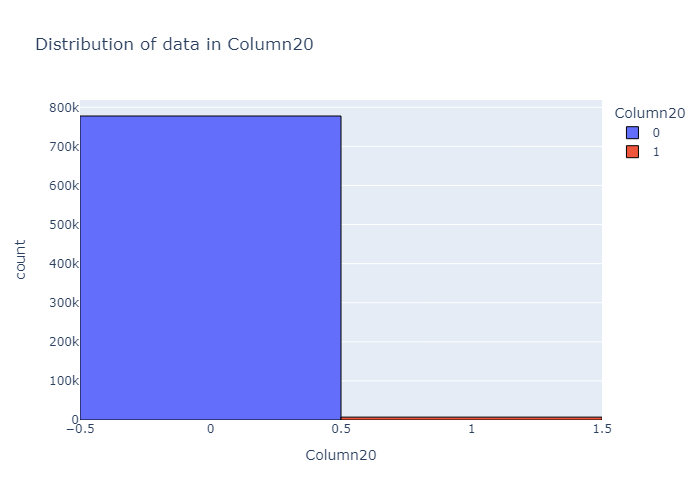

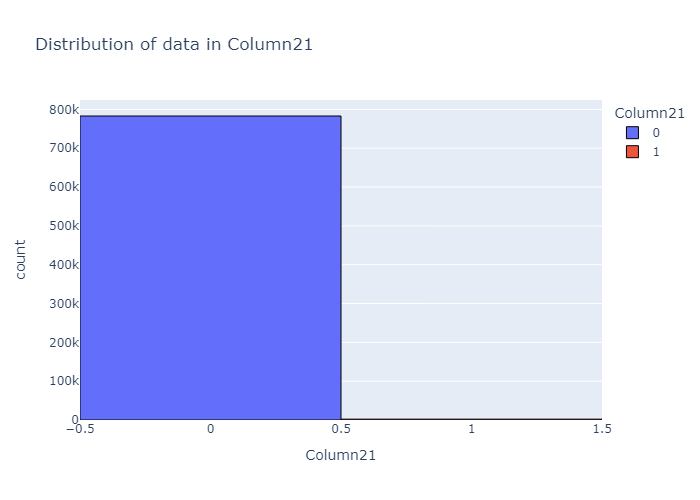

In [306]:
for col in xtrain.columns:
    if xtrain[col].nunique() < 50:
        fig = px.histogram(data_frame=xtrain,
                        x = xtrain[col],
                        color = xtrain[col],
                        title = f'Distribution of data in {col}')
        fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
        fig.show()
    else:
        fig = px.histogram(data_frame=xtrain,
                        x = xtrain[col],
                        title = f'Distribution of data in {col}')
        fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
        fig.show()

- There is a large class imbalance in the target dataset. We will use over sampling techniques like SMOTE and ADASYN to address this.
- There is also a lot of skew in the training features. We will use robust models to deal with this.

### Imputing null values

In [307]:
x_train, x_val, y_train, y_val = train_test_split(xtrain, 
                                                  ytrain, 
                                                  test_size=0.2, 
                                                  stratify = ytrain, 
                                                  random_state=seed) # Creating a stratified validation set

In [308]:
print("Training set class distribution in %:")
print(round(y_train.value_counts(normalize=True), 4)*100)

print("\nValidation set class distributionin %:")
print(round(y_val.value_counts(normalize=True), 4)*100)

Training set class distribution in %:
target
0         90.57
1          9.43
Name: proportion, dtype: float64

Validation set class distributionin %:
target
0         90.57
1          9.43
Name: proportion, dtype: float64


In [309]:
x_val.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
591545,0.0,426,4231.0,0.227021,0.062121,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
592178,0.0,514,2362.0,0.452580,0.062121,-0.007469,-0.407939,-0.015607,0.192057,NaN,...,0,1,0.001351,0.00339,0.0,0,1.0,0,0,0
475414,0.0,1245,2325.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
378155,1.0,2420,23.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015586,-0.774979,NaN,...,1,1,0.001351,0.00339,0.0,0,1.0,0,0,0
54492,0.0,1004,4182.0,0.678139,0.701403,-0.007468,0.315084,-0.015607,0.443411,NaN,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0


In [310]:
y_val.head()

,target
591545,0
592178,1
475414,0
378155,0
54492,0


In [311]:
recall_LR = []
imp_neighbors_LR = []

In [312]:
model_LR = LogisticRegression(n_jobs = -1,
                              random_state = seed)

imputer = IterativeImputer(add_indicator = True, random_state = seed).set_output(transform = 'pandas')

for num in np.linspace(1, 100, 11, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)
    y_train_ravel = np.ravel(y_train)
    y_val_ravel = np.ravel(y_val)

    model_LR.fit(x_train_imp, y_train_ravel)
    model_LR_pred = model_LR.predict(x_val_imp)

    recall = metrics.recall_score(y_val_ravel, model_LR_pred)

    recall_LR.append(recall)
    imp_neighbors_LR.append(num)


In [313]:
recall_LR

[0.8597960424123725,
 0.8751266292969542,
 0.8745188086715743,
 0.858985614911866,
 0.858985614911866,
 0.858985614911866,
 0.858985614911866,
 0.858985614911866,
 0.858985614911866,
 0.858985614911866,
 0.858985614911866]

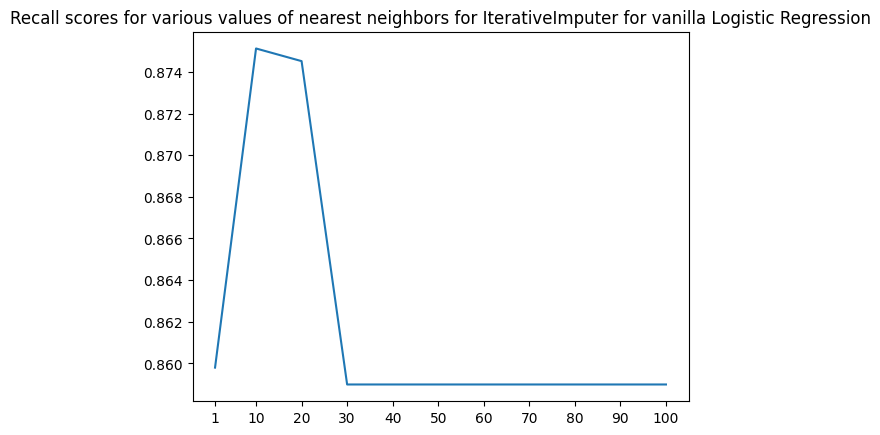

In [314]:
sorted_scores = sorted(zip(recall_LR, imp_neighbors_LR))
sorted_recall = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_recall)
ax.set_xticks(np.linspace(1, 100, 11, dtype=int))
ax.set(title='Recall scores for various values of nearest neighbors for IterativeImputer for vanilla Logistic Regression')

plt.show()

We get maximum recall for `n_nearest_features = 10` for IterativeImputer. Let us expand the search space within 1-10.

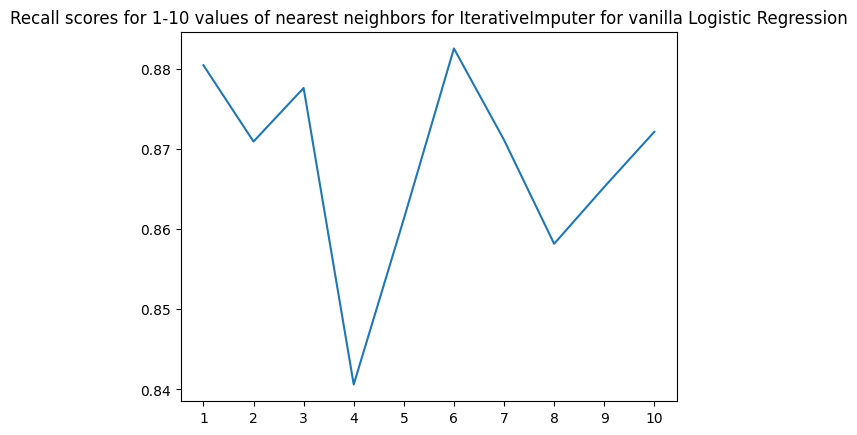

In [315]:
recall_LR = []
imp_neighbors_LR = []

for num in np.linspace(1, 10, 10, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)
    y_train_ravel = np.ravel(y_train)
    y_val_ravel = np.ravel(y_val)

    model_LR.fit(x_train_imp, y_train_ravel)
    model_LR_pred = model_LR.predict(x_val_imp)

    recall = metrics.recall_score(y_val_ravel, model_LR_pred)

    recall_LR.append(recall)
    imp_neighbors_LR.append(num)

sorted_scores = sorted(zip(recall_LR, imp_neighbors_LR))
sorted_recall = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_recall)
ax.set_xticks(np.linspace(1, 10, 10, dtype=int))
ax.set(title='Recall scores for 1-10 values of nearest neighbors for IterativeImputer for vanilla Logistic Regression')

plt.show()

In [316]:
model = []
n_neighbors = []
recall_score_vanilla_model = []

In [317]:
model.append('Logistic Regression')
n_neighbors.append(max(sorted_scores)[1])
recall_score_vanilla_model.append(max(sorted_scores)[0])

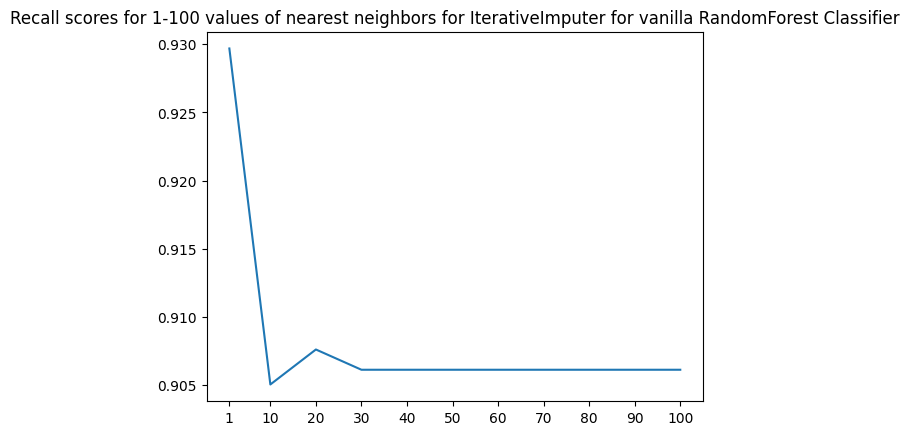

In [318]:
recall_RF = []
imp_neighbors_RF = []

model_RF = RandomForestClassifier(random_state = seed, n_jobs= - 1, class_weight = 'balanced')
imputer = IterativeImputer(add_indicator = True, random_state = seed).set_output(transform = 'pandas')

for num in np.linspace(1, 100, 11, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)
    y_train_ravel = np.ravel(y_train)
    y_val_ravel = np.ravel(y_val)

    model_RF.fit(x_train_imp, y_train_ravel)
    model_RF_pred = model_RF.predict(x_val_imp)

    recall = metrics.recall_score(y_val_ravel, model_RF_pred)

    recall_RF.append(recall)
    imp_neighbors_RF.append(num)

sorted_scores = sorted(zip(recall_RF, imp_neighbors_RF))
sorted_recall = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_recall)
ax.set_xticks(np.linspace(1, 100, 11, dtype=int))
ax.set(title='Recall scores for 1-100 values of nearest neighbors for IterativeImputer for vanilla RandomForest Classifier')

plt.show()

We can observe a sharp decrease in recall in 1-10 values for n_nearest neighbors. Let's expand the search space within 1-10.

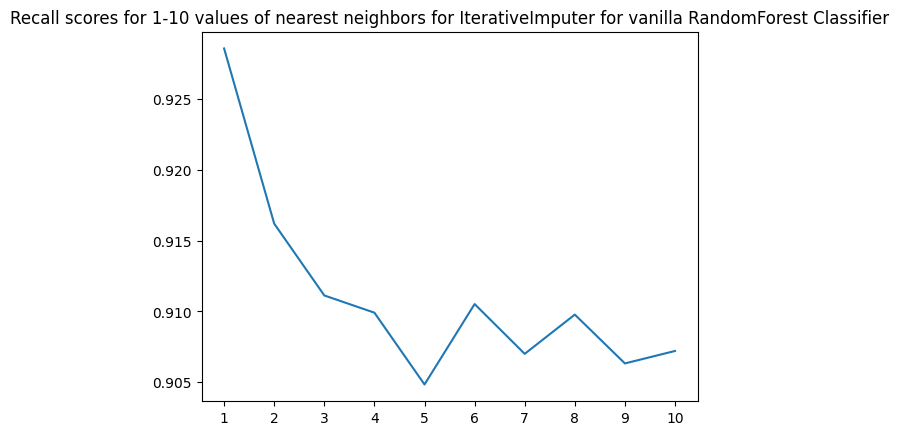

In [319]:
recall_RF = []
imp_neighbors_RF = []

for num in np.linspace(1, 10, 10, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)
    y_train_ravel = np.ravel(y_train)
    y_val_ravel = np.ravel(y_val)

    model_RF.fit(x_train_imp, y_train_ravel)
    model_RF_pred = model_RF.predict(x_val_imp)

    recall = metrics.recall_score(y_val_ravel, model_RF_pred)

    recall_RF.append(recall)
    imp_neighbors_RF.append(num)

sorted_scores = sorted(zip(recall_RF, imp_neighbors_RF))
sorted_recall = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_recall)
ax.set_xticks(np.linspace(1, 10, 10, dtype=int))
ax.set(title='Recall scores for 1-10 values of nearest neighbors for IterativeImputer for vanilla RandomForest Classifier')

plt.show()

In [320]:
max_n_temp = max(sorted_scores)[1]

In [321]:
model.append('Random Forest')
n_neighbors.append(max(sorted_scores)[1])
recall_score_vanilla_model.append(max(sorted_scores)[0])

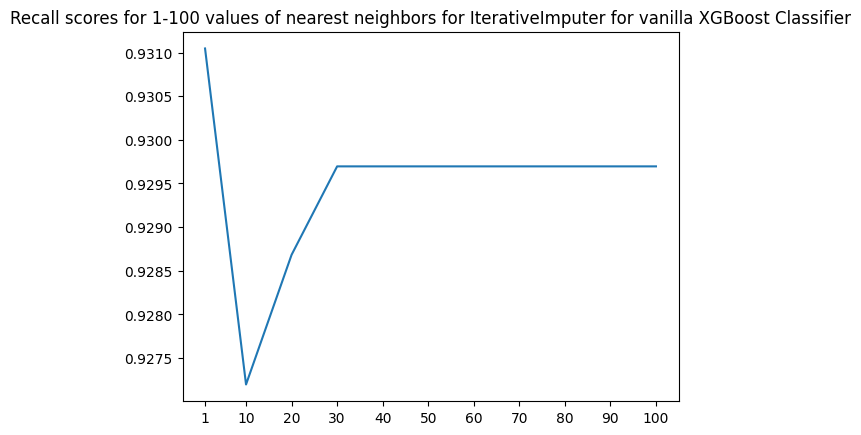

In [322]:
recall_XGB = []
imp_neighbors_XGB = []

model_XGB = XGBClassifier(random_state = seed, n_jobs= - 1)
imputer = IterativeImputer(add_indicator = True, random_state = seed).set_output(transform = 'pandas')

for num in np.linspace(1, 100, 11, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)
    y_train_ravel = np.ravel(y_train)
    y_val_ravel = np.ravel(y_val)

    model_XGB.fit(x_train_imp, y_train_ravel)
    model_XGB_pred = model_XGB.predict(x_val_imp)

    recall = metrics.recall_score(y_val_ravel, model_XGB_pred)

    recall_XGB.append(recall)
    imp_neighbors_XGB.append(num)

sorted_scores = sorted(zip(recall_XGB, imp_neighbors_XGB))
sorted_recall = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_recall)
ax.set_xticks(np.linspace(1, 100, 11, dtype=int))
ax.set(title='Recall scores for 1-100 values of nearest neighbors for IterativeImputer for vanilla XGBoost Classifier')

plt.show()

We can observe a sharp decrease in recall from 1-10, then little increase from 30 onwards. Let us expand the search space over 1-10.

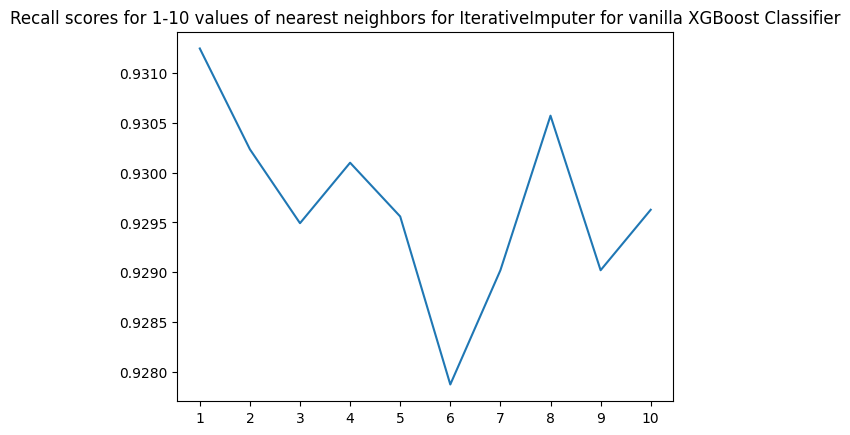

In [323]:
recall_XGB = []
imp_neighbors_XGB = []

for num in np.linspace(1, 10, 10, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)
    y_train_ravel = np.ravel(y_train)
    y_val_ravel = np.ravel(y_val)

    model_XGB.fit(x_train_imp, y_train_ravel)
    model_XGB_pred = model_XGB.predict(x_val_imp)

    recall = metrics.recall_score(y_val_ravel, model_XGB_pred)

    recall_XGB.append(recall)
    imp_neighbors_XGB.append(num)

sorted_scores = sorted(zip(recall_XGB, imp_neighbors_XGB))
sorted_recall = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_recall)
ax.set_xticks(np.linspace(1, 10, 10, dtype=int))
ax.set(title='Recall scores for 1-10 values of nearest neighbors for IterativeImputer for vanilla XGBoost Classifier')

plt.show()

In [324]:
model.append('XGBoost')
n_neighbors.append(max(sorted_scores)[1])
recall_score_vanilla_model.append(max(sorted_scores)[0])

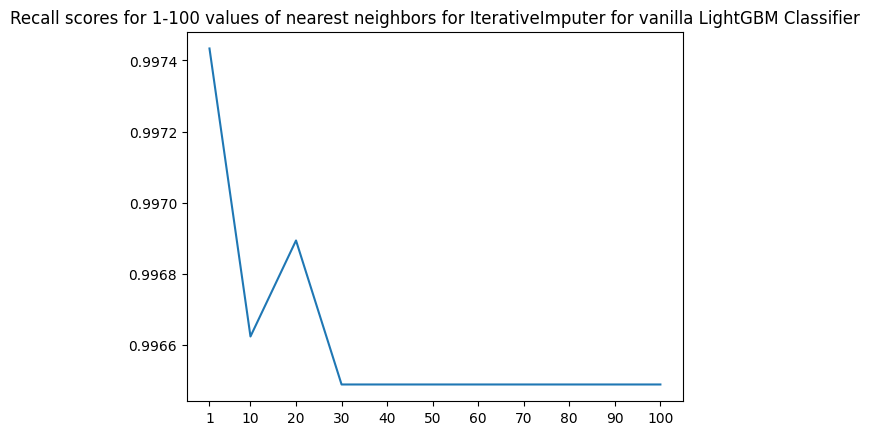

In [325]:
recall_LGBM = []
imp_neighbors_LGBM = []

model_LGBM = LGBMClassifier(random_state = seed, n_jobs= - 1, class_weight = 'balanced', verbose = 0)
imputer = IterativeImputer(add_indicator = True, random_state = seed).set_output(transform = 'pandas')

for num in np.linspace(1, 100, 11, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)
    y_train_ravel = np.ravel(y_train)
    y_val_ravel = np.ravel(y_val)

    model_LGBM.fit(x_train_imp, y_train_ravel,)
    model_LGBM_pred = model_LGBM.predict(x_val_imp)

    recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)

    recall_LGBM.append(recall)
    imp_neighbors_LGBM.append(num)

sorted_scores = sorted(zip(recall_LGBM, imp_neighbors_LGBM))
sorted_recall = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_recall)
ax.set_xticks(np.linspace(1, 100, 11, dtype=int))
ax.set(title='Recall scores for 1-100 values of nearest neighbors for IterativeImputer for vanilla LightGBM Classifier')

plt.show()

Again we see a sharp decrease after 1-10 neighbors. Although we do see an increase between 10-20, we will expand our search space over 1-10.

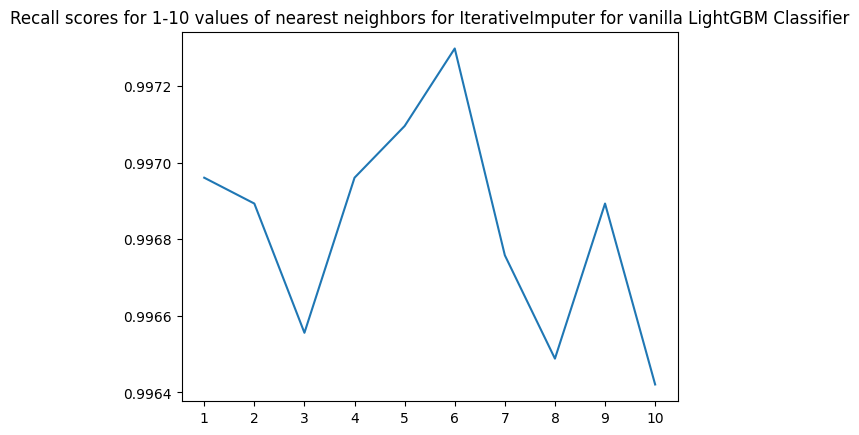

In [326]:
recall_LGBM = []
imp_neighbors_LGBM = []

for num in np.linspace(1, 10, 10, dtype=int):
    
    imputer.set_params(n_nearest_features = num)
    
    x_train_imp = imputer.fit_transform(x_train)
    x_val_imp = imputer.transform(x_val)
    y_train_ravel = np.ravel(y_train)
    y_val_ravel = np.ravel(y_val)

    model_LGBM.fit(x_train_imp, y_train_ravel)
    model_LGBM_pred = model_LGBM.predict(x_val_imp)

    recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)

    recall_LGBM.append(recall)
    imp_neighbors_LGBM.append(num)

sorted_scores = sorted(zip(recall_LGBM, imp_neighbors_LGBM))
sorted_recall = [x[0] for x in sorted_scores]
sorted_neighbors = [y[1] for y in sorted_scores]

ax = sns.lineplot(x = sorted_neighbors, y = sorted_recall)
ax.set_xticks(np.linspace(1, 10, 10, dtype=int))
ax.set(title='Recall scores for 1-10 values of nearest neighbors for IterativeImputer for vanilla LightGBM Classifier')

plt.show()

In [327]:
model.append('LightGBM')
n_neighbors.append(max(sorted_scores)[1])
recall_score_vanilla_model.append(max(sorted_scores)[0])

Compiling all the scores in one DataFrame, we get

In [328]:
recall_score_vanilla_model

[0.8825555480515972,
 0.9285473087053421,
 0.9312487337070304,
 0.9972985749983116]

In [329]:
vanilla_recall_scores = pd.DataFrame({
    'Model': model,
    'n_neighbors': n_neighbors,
    'Score': recall_score_vanilla_model
})

In [330]:
vanilla_recall_scores

,Model,n_neighbors,Score
0,Logistic Regression,6,0.882556
1,Random Forest,1,0.928547
2,XGBoost,1,0.931249
3,LightGBM,6,0.997299


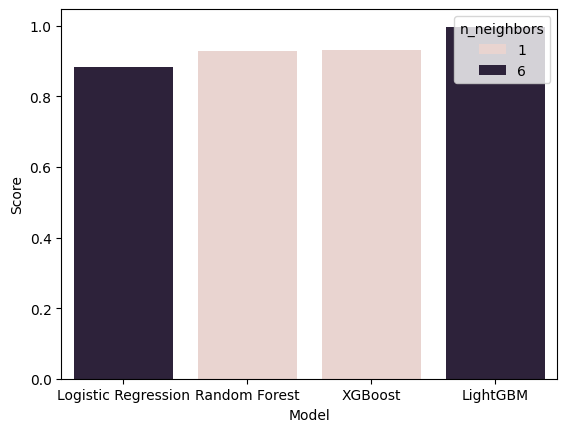

In [331]:
ax = sns.barplot(data=vanilla_recall_scores, 
                  x = vanilla_recall_scores['Model'], 
                  y = vanilla_recall_scores['Score'],
                  hue=vanilla_recall_scores['n_neighbors'])
plt.show()

Vanilla **LightGBM model** gives us the best recall score.

### Metrics on validation set

In [332]:
# metric_list = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc', 'log_loss', 'balanced_accuracy']
model_list = ['LogisticRegression', 'RandomForestClassifier', 'XGBClassifier' ,'LGBMClassifier']

model_list1 = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
auc_roc_list = []
log_loss_list = []
balanced_accuracy_list = []

In [333]:
for model_name in model_list:
    
    model_list1.append(model_name)
    
    if model_name == 'LogisticRegression':
    
        accuracy = metrics.accuracy_score(y_val_ravel, model_LR_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_LR_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_LR_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_LR_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_LR_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_LR_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_LR_pred)
        balanced_accuracy_list.append(balanced_accuracy)
    
    elif model_name == 'RandomForestClassifier':
    
        accuracy = metrics.accuracy_score(y_val_ravel, model_RF_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_RF_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_RF_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_RF_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_RF_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_RF_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_RF_pred)
        balanced_accuracy_list.append(balanced_accuracy)

    elif model_name == 'XGBClassifier':
    
        accuracy = metrics.accuracy_score(y_val_ravel, model_XGB_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_XGB_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_XGB_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_XGB_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_XGB_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_XGB_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_XGB_pred)
        balanced_accuracy_list.append(balanced_accuracy)

    elif model_name == 'LGBMClassifier':
    
        accuracy = metrics.accuracy_score(y_val_ravel, model_LGBM_pred)
        accuracy_list.append(accuracy)

        precision = metrics.precision_score(y_val_ravel, model_LGBM_pred)
        precision_list.append(precision)

        recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)
        recall_list.append(recall)

        f1_score = metrics.f1_score(y_val_ravel, model_LGBM_pred)
        f1_list.append(f1_score)

        auc_roc = metrics.roc_auc_score(y_val_ravel, model_LGBM_pred) 
        auc_roc_list.append(auc_roc)

        log_loss = metrics.log_loss(y_val_ravel, model_LGBM_pred)
        log_loss_list.append(log_loss)

        balanced_accuracy = metrics.balanced_accuracy_score(y_val_ravel, model_LGBM_pred)
        balanced_accuracy_list.append(balanced_accuracy)

In [334]:
model_scores = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1_score': f1_list,
    'AUC-ROC_score': auc_roc_list,
    'Log-Loss_score': log_loss_list,
    'Balanced_accuracy': balanced_accuracy_list
})

In [335]:
model_scores

,Model,Accuracy,Precision,Recall,F1_score,AUC-ROC_score,Log-Loss_score,Balanced_accuracy
0,LogisticRegression,0.968674,0.810163,0.872155,0.840017,0.925439,1.129097,0.925439
1,RandomForestClassifier,0.975125,0.841403,0.907206,0.873066,0.944701,0.896575,0.944701
2,XGBClassifier,0.977571,0.847338,0.929628,0.886577,0.956095,0.808433,0.956095
3,LGBMClassifier,0.971897,0.771895,0.996421,0.869904,0.982882,1.012951,0.982882


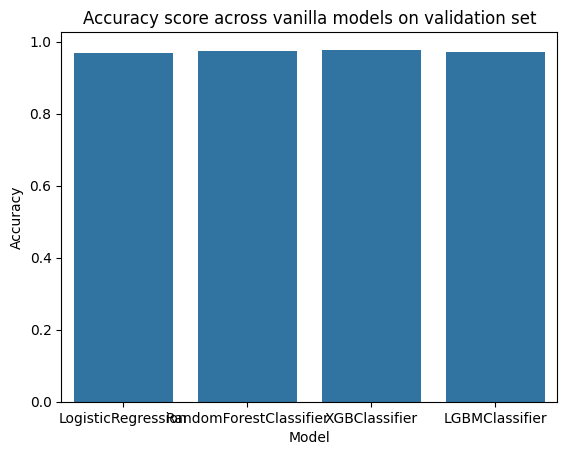

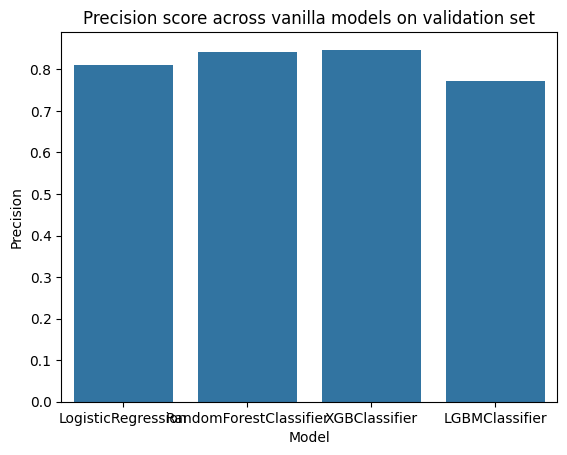

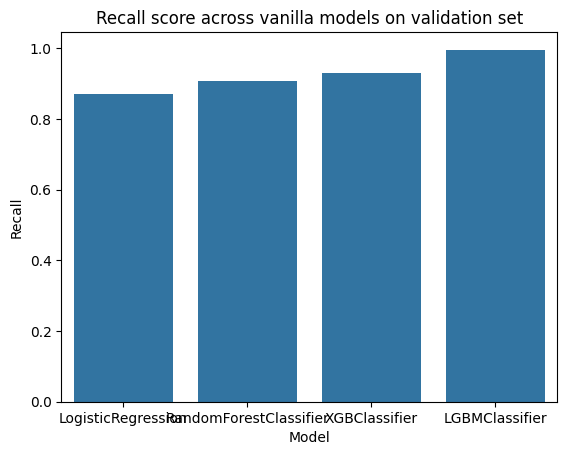

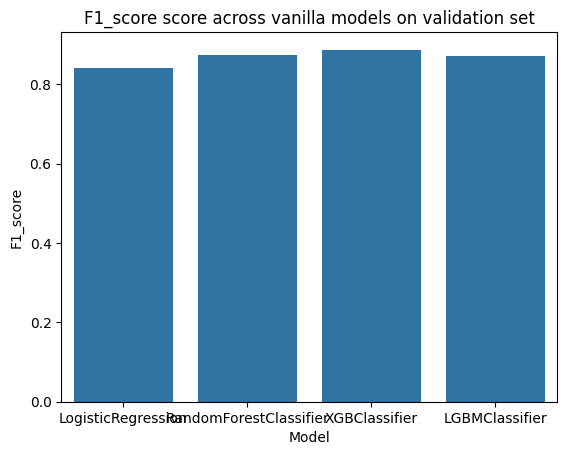

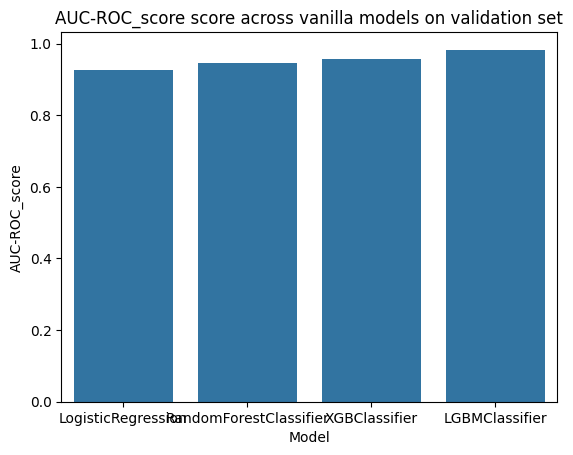

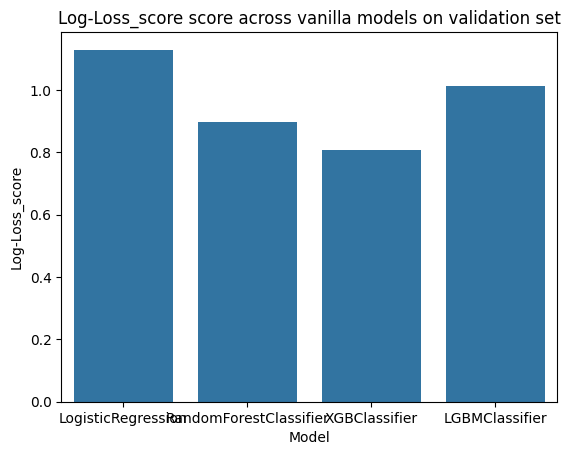

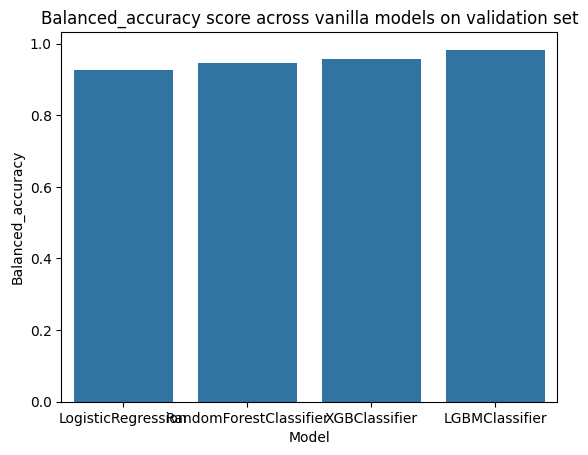

In [336]:
for col in model_scores.columns[1:]:
    ax = sns.barplot(data=model_scores, x = 'Model', y = col)
    ax.set_title(f'{col} score across vanilla models on validation set')
    plt.show()

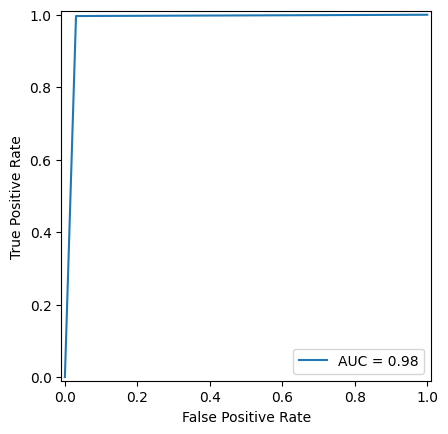

In [337]:
rep = metrics.classification_report(y_val_ravel, model_LGBM_pred)
recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)
f1 = metrics.f1_score(y_val_ravel, model_LGBM_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_val_ravel, model_LGBM_pred)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()
display

In [338]:
print(rep)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    142220
           1       0.77      1.00      0.87     14807

    accuracy                           0.97    157027
   macro avg       0.89      0.98      0.93    157027
weighted avg       0.98      0.97      0.97    157027



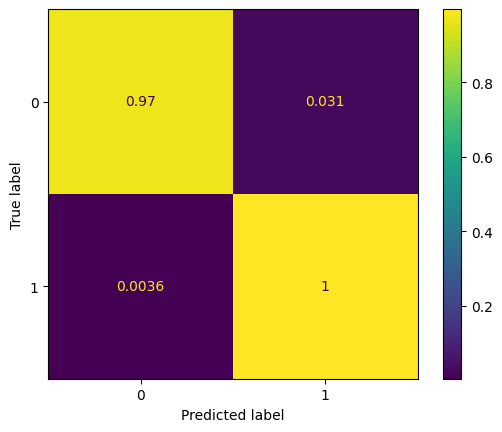

In [339]:
confusion_matrix = metrics.confusion_matrix(y_val_ravel, model_LGBM_pred, normalize = 'true')
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=model_LGBM.classes_)
confusion_matrix_display.plot()

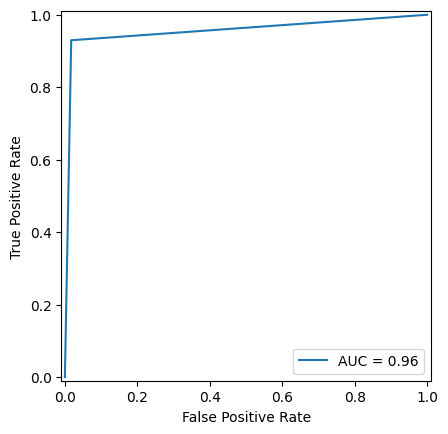

In [340]:
rep = metrics.classification_report(y_val_ravel, model_XGB_pred)
recall = metrics.recall_score(y_val_ravel, model_XGB_pred)
f1 = metrics.f1_score(y_val_ravel, model_XGB_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_val_ravel, model_XGB_pred)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()

In [341]:
print(rep)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    142220
           1       0.85      0.93      0.89     14807

    accuracy                           0.98    157027
   macro avg       0.92      0.96      0.94    157027
weighted avg       0.98      0.98      0.98    157027



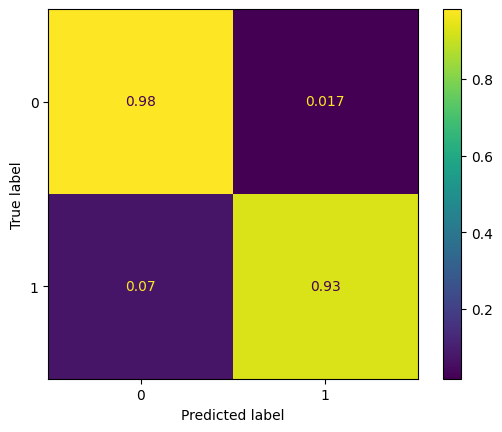

In [342]:
confusion_matrix = metrics.confusion_matrix(y_val_ravel, model_XGB_pred, normalize = 'true')
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=model_XGB.classes_)
confusion_matrix_display.plot()

In [343]:
imputer = IterativeImputer(add_indicator = True, random_state = seed).set_output(transform = 'pandas')
adasyn = ADASYN(random_state = seed)
f1_scores_upsampled = []
n_neighbors_upsampled = []

In [344]:
# for num in range (1, 6):
#     imputer.set_params(n_nearest_features = num)
#     x_train_imp = imputer.fit_transform(x_train)
#     x_val_imp = imputer.transform(x_val)

#     for neighbors in np.linspace(1, 20, 5, dtype = int):
#         adasyn.set_params(n_neighbors = neighbors)
#         x_train_upsampled, y_train_upsampled = adasyn.fit_resample(x_train_imp, y_train_ravel)

#         model_RF.fit(x_train_upsampled, y_train_upsampled)
#         model_RF_upsampled_pred = model_RF.predict(x_val_imp)

#         n_neighbors_upsampled.append(num)
#         f1_scores_upsampled.append(metrics.f1_score(y_val_ravel, model_RF_upsampled_pred))

## Model building

In [345]:
xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Column0,785124.0,0.440757,1.163275,0.000000,0.000000,0.000000,0.000000,18.000000
Column1,785133.0,1321.788614,907.267965,-1080.000000,515.000000,1173.000000,2435.000000,2499.000000
Column2,785133.0,2951.279411,2143.140140,-47.000000,1129.000000,2709.000000,4472.000000,10290.000000
Column3,658830.0,-0.000210,0.999935,-2.028572,-0.675216,0.678139,0.678139,0.678139
Column4,657423.0,-0.000855,1.000350,-1.855728,-0.577162,0.701403,0.701403,0.701403
Column5,617953.0,-0.000367,1.015255,-0.007469,-0.007469,-0.007469,-0.007468,551.421127
Column6,781283.0,-0.000709,0.998984,-0.407939,-0.407939,-0.407939,-0.367723,14.985817
Column7,785133.0,0.000727,1.045883,-0.015607,-0.015607,-0.015607,-0.015607,201.687947
Column8,781283.0,-0.000158,1.056769,-0.774979,-0.774979,0.122085,0.625528,323.992484
Column9,52996.0,0.005245,1.111058,-0.088554,-0.086503,-0.081820,-0.063140,133.911803


In [346]:
cat_cols = ['Column10', 'Column11', 'Column12', 'Column13', 'Column19', 'Column20', 'Column21']
num_cols = [x for x in xtrain.columns if x not in cat_cols]

In [347]:
num_cols

['Column0',
 'Column1',
 'Column2',
 'Column3',
 'Column4',
 'Column5',
 'Column6',
 'Column7',
 'Column8',
 'Column9',
 'Column14',
 'Column15',
 'Column16',
 'Column17',
 'Column18']

In [348]:
x_train_imp = imputer.set_params(n_nearest_features = None).fit_transform(x_train)
x_val_imp = imputer.transform(x_val)

In [349]:
x_train_imp.columns

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21',
       'missingindicator_Column0', 'missingindicator_Column3',
       'missingindicator_Column4', 'missingindicator_Column5',
       'missingindicator_Column6', 'missingindicator_Column8',
       'missingindicator_Column9', 'missingindicator_Column14',
       'missingindicator_Column15'],
      dtype='object')

In [350]:
y_train_ravel = np.ravel(y_train)
y_val_ravel = np.ravel(y_val)

In [351]:
sc = StandardScaler().set_output(transform='pandas')

In [352]:
x_train_scaled = sc.fit_transform(x_train_imp[num_cols])
x_val_scaled = sc.transform(x_val_imp[num_cols])

In [353]:
x_train_scaled = pd.concat([x_train_scaled, x_train[cat_cols], x_train_imp[x_train_imp.columns[22:]]],  axis = 1)
x_val_scaled = pd.concat([x_val_scaled, x_val[cat_cols], x_val_imp[x_val_imp.columns[22:]]], axis = 1)

In [354]:
x_train_scaled.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column21,missingindicator_Column0,missingindicator_Column3,missingindicator_Column4,missingindicator_Column5,missingindicator_Column6,missingindicator_Column8,missingindicator_Column9,missingindicator_Column14,missingindicator_Column15
345112,-0.378582,1.293136,0.121356,0.756461,0.798900,-0.007579,3.449906,-0.016073,0.297306,-0.487926,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
375304,-0.378582,1.293136,-0.369503,0.756461,0.798900,-0.007577,-0.409224,-0.016088,0.239298,-0.082461,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
269786,-0.378582,-0.985161,-0.348972,0.756461,0.798900,-0.007579,-0.409224,-0.016088,-0.771875,-0.255173,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
695103,-0.378582,-0.953197,0.779256,-2.195982,-1.971579,-0.004333,-0.409224,-0.016088,-0.771875,-0.158853,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
196000,-0.378582,0.330894,-0.341507,-0.227687,0.798900,-0.007578,-0.409224,-0.016088,0.324320,0.067964,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [355]:
x_train_scaled.columns.value_counts()

Column0                      1
Column11                     1
missingindicator_Column14    1
missingindicator_Column9     1
missingindicator_Column8     1
missingindicator_Column6     1
missingindicator_Column5     1
missingindicator_Column4     1
missingindicator_Column3     1
missingindicator_Column0     1
Column21                     1
Column20                     1
Column19                     1
Column13                     1
Column12                     1
Column10                     1
Column1                      1
Column18                     1
Column17                     1
Column16                     1
Column15                     1
Column14                     1
Column9                      1
Column8                      1
Column7                      1
Column6                      1
Column5                      1
Column4                      1
Column3                      1
Column2                      1
missingindicator_Column15    1
Name: count, dtype: int64

In [356]:
model_RF.fit(x_train_scaled, y_train_ravel)
model_XGB.fit(x_train_scaled, y_train_ravel)
model_LGBM.fit(x_train_scaled, y_train_ravel)

model_RF_pred = model_RF.predict(x_val_scaled)
model_XGB_pred = model_XGB.predict(x_val_scaled)
model_LGBM_pred = model_LGBM.predict(x_val_scaled)

RF_precision = metrics.precision_score(y_val_ravel, model_RF_pred)
RF_recall = metrics.recall_score(y_val_ravel, model_RF_pred)
RF_f1 = metrics.f1_score(y_val_ravel, model_RF_pred)

XGB_precision = metrics.precision_score(y_val_ravel, model_XGB_pred)
XGB_recall = metrics.recall_score(y_val_ravel, model_XGB_pred)
XGB_f1 = metrics.f1_score(y_val_ravel, model_XGB_pred)

LGBM_precision = metrics.precision_score(y_val_ravel, model_LGBM_pred)
LGBM_recall = metrics.recall_score(y_val_ravel, model_LGBM_pred)
LGBM_f1 = metrics.f1_score(y_val_ravel, model_LGBM_pred)

In [357]:
print('Max precision:', np.max([RF_precision, XGB_precision, LGBM_precision]), model_list1[1:][np.argmax([RF_precision, XGB_precision, LGBM_precision])])
print('Max recall:', np.max([RF_recall, XGB_recall, LGBM_recall]), model_list1[1:][np.argmax([RF_recall, XGB_recall, LGBM_recall])])
print('Max f1:', np.max([RF_f1, XGB_f1, LGBM_f1]), model_list1[1:][np.argmax([RF_f1, XGB_f1, LGBM_f1])])

Max precision: 0.8475256077995804 XGBClassifier
Max recall: 0.9968933612480584 LGBMClassifier
Max f1: 0.8857575855286492 XGBClassifier


In [358]:
print('Random Forest Precision: ', RF_precision)
print('Random Forest recall: ', RF_recall)
print('Random Forest f1: ', RF_f1)

print()

print('XGBoost Precision: ', XGB_precision)
print('XGBoost recall: ', XGB_recall)
print('XGBoost f1: ', XGB_f1)

print()

print('LGBM Precision: ', LGBM_precision)
print('LGBM recall: ', LGBM_recall)
print('LGBM f1: ', LGBM_f1)

Random Forest Precision:  0.8417293233082707
Random Forest recall:  0.907273586817046
Random Forest f1:  0.8732733123151428

XGBoost Precision:  0.8475256077995804
XGBoost recall:  0.9276018099547512
XGBoost f1:  0.8857575855286492

LGBM Precision:  0.7720995920075322
LGBM recall:  0.9968933612480584
LGBM f1:  0.8702137067059691


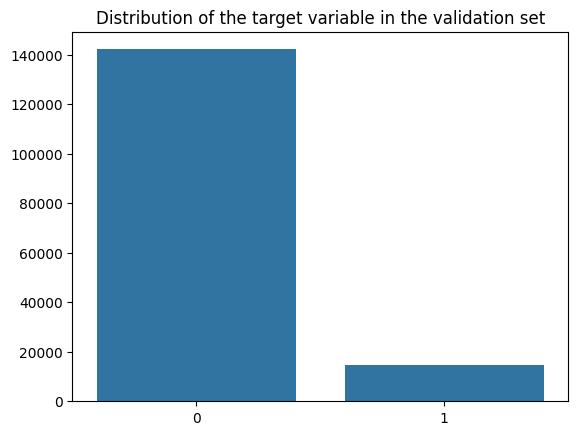

In [359]:
ax = sns.barplot(data = Counter(y_val_ravel))
ax.set_title('Distribution of the target variable in the validation set')
plt.show()

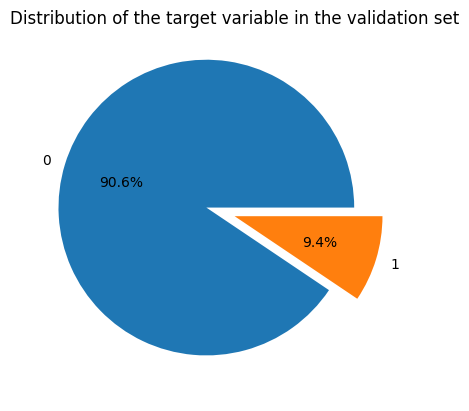

In [360]:
plt.pie(x = Counter(y_val_ravel).values(), 
        labels = Counter(y_val_ravel).keys(), 
        normalize = True, 
        explode = [0.2, 0],
        autopct='%1.1f%%'
        )
plt.title('Distribution of the target variable in the validation set')
plt.show()

In [361]:
adasyn = ADASYN(random_state = seed,
                sampling_strategy = 'minority')

smote = SMOTE(random_state = seed,
              sampling_strategy='minority')

In [362]:
f1_XGB = []
ada_neighbors_XGB = []

f1_LGBM = []
ada_neighbors_LGBM = []

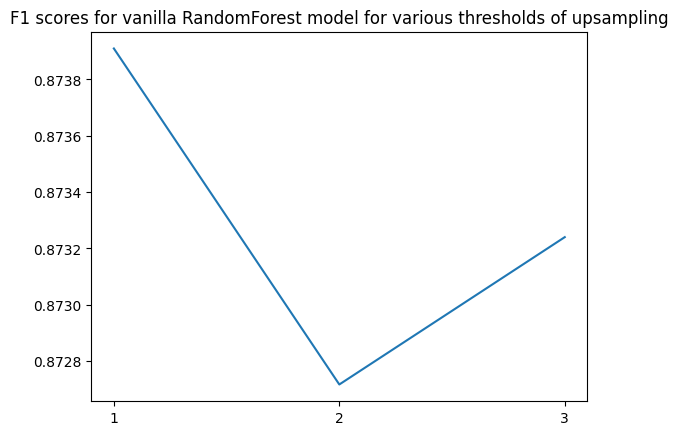

In [363]:
f1_RF = []
ada_neighbors_RF = []

for num in np.linspace(1, 3, 3, dtype = int):
    adasyn.set_params(n_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = adasyn.fit_resample(x_train_scaled, y_train_ravel)

    model_RF.fit(x_train_upsampled, y_train_upsampled)
    model_RF_upsample_pred = model_RF.predict(x_val_scaled)

    RF_upsample_f1 = metrics.f1_score(y_val_ravel, model_RF_upsample_pred)

    f1_RF.append(RF_upsample_f1)
    ada_neighbors_RF.append(num)

ax = sns.lineplot(x = ada_neighbors_RF, y = f1_RF)
ax.set_xticks(np.linspace(1, 3, 3, dtype = int))
ax.set_title('F1 scores for vanilla RandomForest model for various thresholds of upsampling - ADASYN')

plt.show()
    

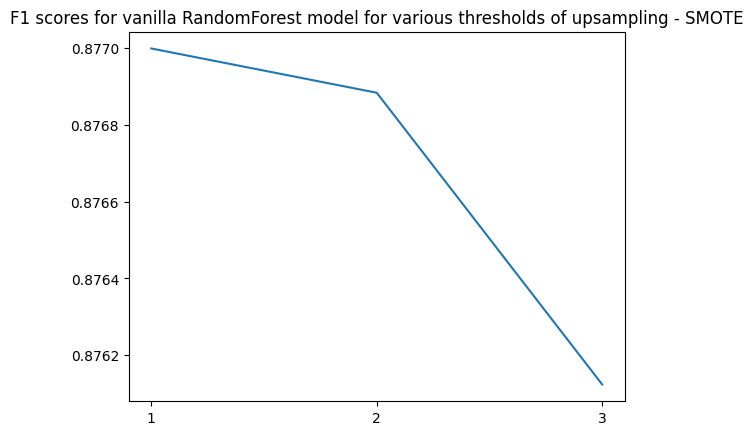

In [364]:
f1_RF = []
smote_neighbors_RF = []

for num in np.linspace(1, 3, 3, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_RF.fit(x_train_upsampled, y_train_upsampled)
    model_RF_upsample_pred = model_RF.predict(x_val_scaled)

    RF_upsample_f1 = metrics.f1_score(y_val_ravel, model_RF_upsample_pred)

    f1_RF.append(RF_upsample_f1)
    smote_neighbors_RF.append(num)

ax = sns.lineplot(x = smote_neighbors_RF, y = f1_RF)
ax.set_xticks(np.linspace(1, 3, 3, dtype = int))
ax.set_title('F1 scores for vanilla RandomForest model for various thresholds of upsampling - SMOTE')

plt.show()

### SMOTE performs better and in less time, hence we will use SMOTE to upscale the data.

In [365]:
model_smote = []
k_neighbors = []
f1_score_vanilla_model = []

### RandomForest

In [366]:
f1_RF = []
smote_neighbors_RF = []

for num in np.linspace(1, 100, 11, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_RF.fit(x_train_upsampled, y_train_upsampled)
    model_RF_upsample_pred = model_RF.predict(x_val_scaled)

    RF_upsample_f1 = metrics.f1_score(y_val_ravel, model_RF_upsample_pred)

    f1_RF.append(RF_upsample_f1)
    smote_neighbors_RF.append(num)

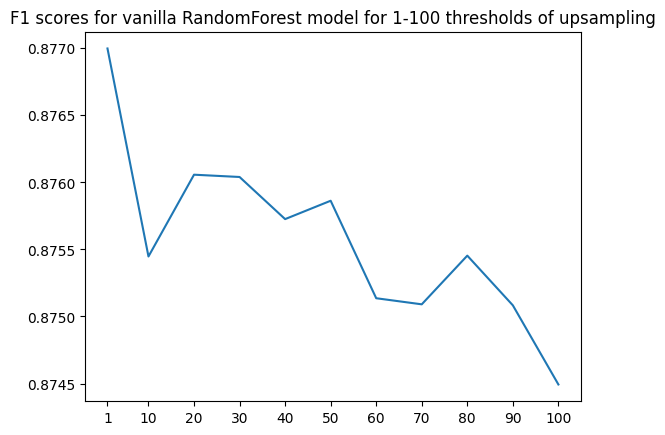

In [367]:
ax = sns.lineplot(x = smote_neighbors_RF, y = f1_RF)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int))
ax.set_title('F1 scores for vanilla RandomForest model for 1-100 thresholds of upsampling')

plt.show()

We will expand the search space over 1-10.

In [368]:
f1_RF = []
smote_neighbors_RF = []

for num in np.linspace(1, 10, 10, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_RF.fit(x_train_upsampled, y_train_upsampled)
    model_RF_upsample_pred = model_RF.predict(x_val_scaled)

    RF_upsample_f1 = metrics.f1_score(y_val_ravel, model_RF_upsample_pred)

    f1_RF.append(RF_upsample_f1)
    smote_neighbors_RF.append(num)

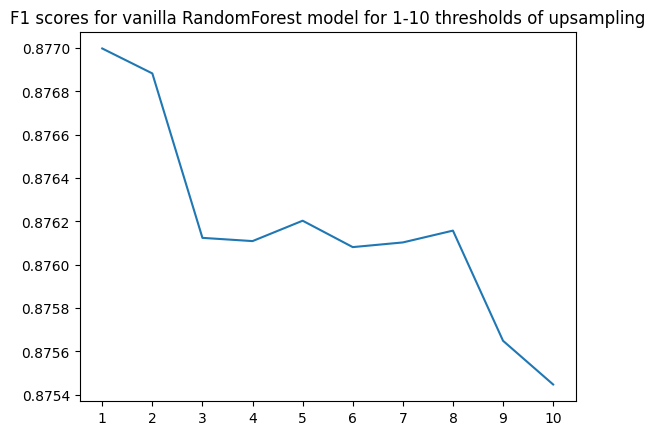

In [369]:
ax = sns.lineplot(x = smote_neighbors_RF, y = f1_RF)
ax.set_xticks(np.linspace(1, 10, 10, dtype = int))
ax.set_title('F1 scores for vanilla RandomForest model for 1-10 thresholds of upsampling')

plt.show()

In [370]:
max_score = max(sorted(zip(f1_RF, smote_neighbors_RF)))

In [371]:
model_smote.append('Random Forest')
k_neighbors.append(max_score[1])
f1_score_vanilla_model.append(max_score[0])

In [372]:
f1_XGB = []
smote_neighbors_XGB = []

for num in np.linspace(1, 100, 11, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_XGB.fit(x_train_upsampled, y_train_upsampled)
    model_XGB_upsample_pred = model_XGB.predict(x_val_scaled)

    XGB_upsample_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)

    f1_XGB.append(XGB_upsample_f1)
    smote_neighbors_XGB.append(num)

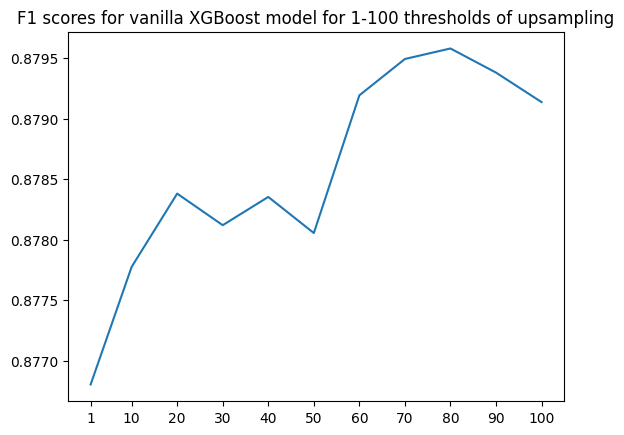

In [373]:
ax = sns.lineplot(x = smote_neighbors_XGB, y = f1_XGB)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int))
ax.set_title('F1 scores for vanilla XGBoost model for 1-100 thresholds of upsampling')

plt.show()

We get maximum F1 scores in between 70-90. Let us expand out search space over it.

In [374]:
f1_XGB = []
smote_neighbors_XGB = []

for num in range(70, 91):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_XGB.fit(x_train_upsampled, y_train_upsampled)
    model_XGB_upsample_pred = model_XGB.predict(x_val_scaled)

    XGB_upsample_f1 = metrics.f1_score(y_val_ravel, model_XGB_upsample_pred)

    f1_XGB.append(XGB_upsample_f1)
    smote_neighbors_XGB.append(num)

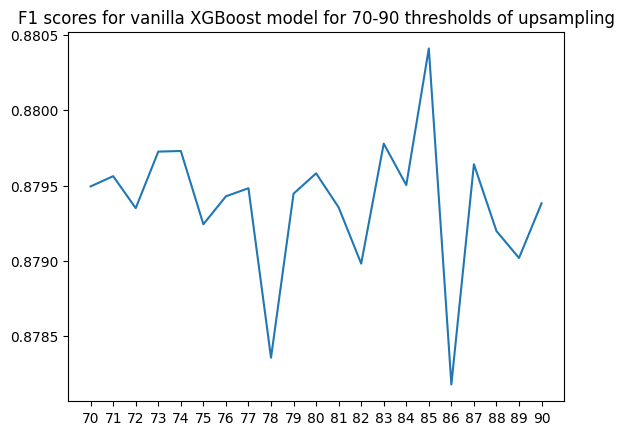

In [375]:
ax = sns.lineplot(x = smote_neighbors_XGB, y = f1_XGB)
ax.set_xticks(range(70, 91))
ax.set_title('F1 scores for vanilla XGBoost model for 70-90 thresholds of upsampling')

plt.show()

In [376]:
max_score = max(sorted(zip(f1_XGB, smote_neighbors_XGB)))
max_score

(0.8804109922178989, 85)

In [377]:
model_smote.append('XGBoost')
k_neighbors.append(max_score[1])
f1_score_vanilla_model.append(max_score[0])

In [378]:
f1_LGBM = []
smote_neighbors_LGBM = []

for num in np.linspace(1, 100, 11, dtype = int):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_LGBM.fit(x_train_upsampled, y_train_upsampled)
    model_LGBM_upsample_pred = model_LGBM.predict(x_val_scaled)

    LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, model_LGBM_upsample_pred)

    f1_LGBM.append(LGBM_upsample_f1)
    smote_neighbors_LGBM.append(num)

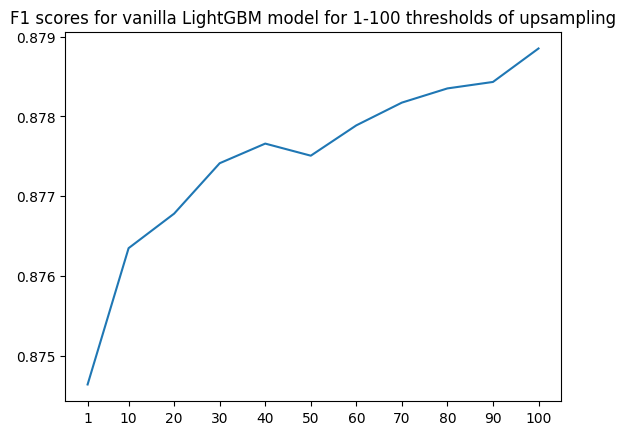

In [379]:
ax = sns.lineplot(x = smote_neighbors_LGBM, y = f1_LGBM)
ax.set_xticks(np.linspace(1, 100, 11, dtype = int))
ax.set_title('F1 scores for vanilla LightGBM model for 1-100 thresholds of upsampling')

plt.show()

We get maximum F1 scores in between 80-100. Let us expand out search space over it.

In [381]:
f1_LGBM = []
smote_neighbors_LGBM = []

for num in range(80, 101):
    smote.set_params(k_neighbors = num)
    
    x_train_upsampled, y_train_upsampled = smote.fit_resample(x_train_scaled, y_train_ravel)

    model_LGBM.fit(x_train_upsampled, y_train_upsampled)
    model_LGBM_upsample_pred = model_LGBM.predict(x_val_scaled)

    LGBM_upsample_f1 = metrics.f1_score(y_val_ravel, model_LGBM_upsample_pred)

    f1_LGBM.append(LGBM_upsample_f1)
    smote_neighbors_LGBM.append(num)

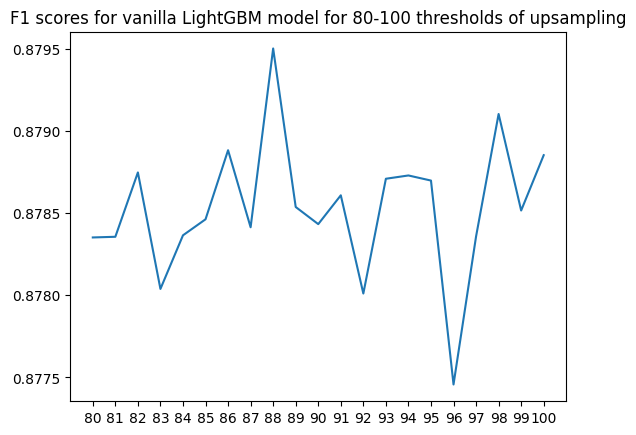

In [382]:
ax = sns.lineplot(x = smote_neighbors_LGBM, y = f1_LGBM)
ax.set_xticks(range(80, 101))
ax.set_title('F1 scores for vanilla LightGBM model for 80-100 thresholds of upsampling')

plt.show()

In [384]:
max_score = max(sorted(zip(f1_LGBM, smote_neighbors_LGBM)))
max_score

(0.8795024304821715, 88)

In [385]:
model_smote.append('LightGBM')
k_neighbors.append(max_score[1])
f1_score_vanilla_model.append(max_score[0])

In [386]:
smote_f1_scores = pd.DataFrame({
    'Model': model_smote,
    'Neighbors': k_neighbors,
    'F1 Score': f1_score_vanilla_model
})

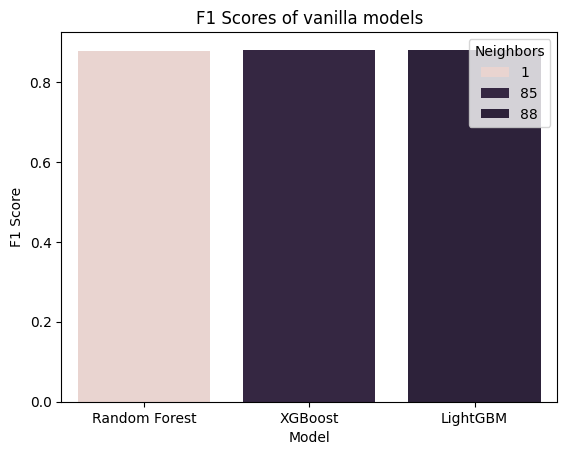

In [387]:
ax = sns.barplot(y=smote_f1_scores['F1 Score'], x = smote_f1_scores['Model'], hue = smote_f1_scores['Neighbors'])
ax.set_title('F1 Scores of vanilla models')
plt.show()

We are getting good F1 scores for each vanilla model.

## Model Building and Optimization

In [388]:
smote_f1_scores

,Model,Neighbors,F1 Score
0,Random Forest,1,0.876998
1,XGBoost,85,0.880411
2,LightGBM,88,0.879502


In [389]:
rf_neighbors   = smote_f1_scores[smote_f1_scores['Model']=='Random Forest']['Neighbors'].values[0]
xgb_neighbors  = smote_f1_scores[smote_f1_scores['Model']=='XGBoost']['Neighbors'].values[0]
lgbm_neighbors = smote_f1_scores[smote_f1_scores['Model']=='LightGBM']['Neighbors'].values[0]

print(rf_neighbors, xgb_neighbors, lgbm_neighbors)

1 85 88


Preparing data for RandomForest Classifier

In [390]:
x_train_upsampled_RF, y_train_upsampled_RF = smote.set_params(k_neighbors = rf_neighbors).fit_resample(x_train_scaled, y_train_ravel)

Preparing data for XGBosot Classifier

In [391]:
x_train_upsampled_XGB, y_train_upsampled_XGB = smote.set_params(k_neighbors = xgb_neighbors).fit_resample(x_train_scaled, y_train_ravel)

Preparing data for LightGBM Classifier

In [392]:
x_train_upsampled_LGBM, y_train_upsampled_LGBM = smote.set_params(k_neighbors = lgbm_neighbors).fit_resample(x_train_scaled, y_train_ravel)

## Hyperparameter Tuning

In [393]:
optuna_model = []
optuna_f1_score = []
optuna_precision_score = []
optuna_recall_score = []

In [397]:
def objective(trial):
    params_rf = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1000),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 10, 30),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }

    optuna_RF = RandomForestClassifier(**params_rf, 
                                       random_state = seed, 
                                       n_jobs = -1,
                                       oob_score = True)
    
    optuna_RF.fit(x_train_upsampled_RF, y_train_upsampled_RF)
    optuna_RF_pred = optuna_RF.predict(x_val_scaled)

    score_optuna_RF_F1 = metrics.f1_score(y_val_ravel, optuna_RF_pred)

    return score_optuna_RF_F1

In [ ]:
sampler = optuna.samplers.TPESampler(seed = seed)
study = optuna.create_study(direction='maximize')

study.optimize(objective,
               n_trials = 10,
               n_jobs = -1,
               show_progress_bar = True)

In [401]:
study.best_value

0.8687822878228783

In [400]:
study.best_params

{'n_estimators': 904,
 'max_depth': 18,
 'min_samples_split': 11,
 'max_features': 'sqrt'}

In [ ]:
tuned_RF = RandomForestClassifier(**study.best_params)

tuned_RF.fit(x_train_upsampled_RF, y_train_upsampled_RF)
tuned_RF_pred = tuned_RF.predict(x_val_scaled)

In [ ]:
optuna_RF_F1_score = metrics.f1_score(y_val_ravel, tuned_RF_pred)
optuna_RF_precision_score = metrics.precision_score(y_val_ravel, tuned_RF_pred)
optuna_RF_recall_score = metrics.recall_score(y_val_ravel, tuned_RF_pred)

In [ ]:
print(f'F1 score after tuning RandomForestClassifier model: {}')
print(f'Precision score after tuning RandomForestClassifier model: {study.best_value}')
print(f'Recall score after tuning RandomForestClassifier model: {study.best_value}')

In [ ]:
optuna_model.append('Random Forest Classifier')
optuna_f1_score.append(optuna_RF_F1_score)
optuna_precision_score.append(optuna_RF_precision_score)
optuna_recall_score.append(optuna_RF_recall_score)

In [ ]:
joblib.dump(tuned_RF, 'models/RandomForestClassifier')